In [57]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [58]:
df_DA_Phil = df[df['job_country'] == 'Philippines'] 

In [59]:
df_skills = df_DA_Phil.explode('job_skills')

df_skills[['job_title_short', 'job_skills']]

,job_title_short,job_skills
76,Data Analyst,sql
76,Data Analyst,python
76,Data Analyst,r
76,Data Analyst,excel
76,Data Analyst,tableau
...,...,...
785690,Data Scientist,vba
785690,Data Scientist,sap
785690,Data Scientist,word
785690,Data Scientist,powerpoint


In [60]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
276,excel,Data Analyst,2242
1002,sql,Data Analyst,1781
1003,sql,Data Engineer,1303
777,python,Data Engineer,1097
776,python,Data Analyst,980
...,...,...,...
1060,t-sql,Machine Learning Engineer,1
169,codecommit,Data Engineer,1
168,cobol,Software Engineer,1
167,clickup,Senior Data Analyst,1


In [61]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Business Analyst', 'Data Analyst', 'Data Engineer']

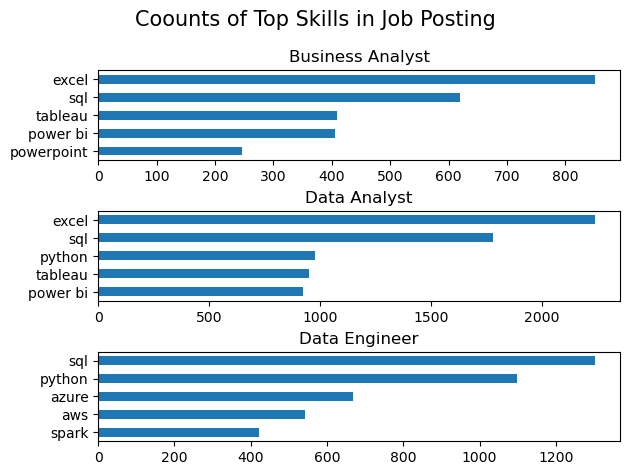

In [62]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Coounts of Top Skills in Job Posting', fontsize=15)
fig.tight_layout(h_pad=0.5)

In [63]:
df_job_title_count = df_DA_Phil['job_title_short'].value_counts().reset_index(name='job_total')

In [68]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_perc['skill_percent'] = 100 * (df_skills_perc['skill_count'] / df_skills_perc['job_total']) 
df_skills_perc

,job_skills,job_title_short,skill_count,skill_percent,job_total
0,excel,Data Analyst,2242,47.041544,4766
1,sql,Data Analyst,1781,37.368863,4766
2,sql,Data Engineer,1303,63.529985,2051
3,python,Data Engineer,1097,53.486104,2051
4,python,Data Analyst,980,20.562316,4766
...,...,...,...,...,...
1223,t-sql,Machine Learning Engineer,1,0.806452,124
1224,codecommit,Data Engineer,1,0.048757,2051
1225,cobol,Software Engineer,1,0.183150,546
1226,clickup,Senior Data Analyst,1,0.184502,542


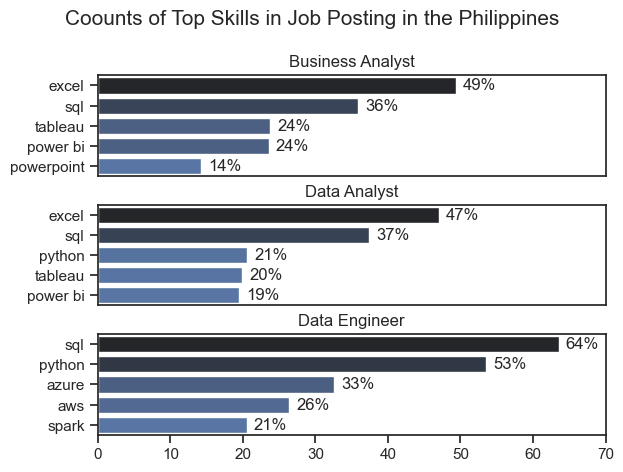

In [83]:
fig, ax = plt.subplots(len(job_titles), 1) 

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,70) 

    for n, v, in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])
fig.suptitle('Coounts of Top Skills in Job Posting in the Philippines', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()